# Add necessary modules



In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset

In [75]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Describe the dataset and list first 10 rows

In [76]:
df.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Display the shape of the daatset

In [77]:
df.shape

(21, 2)

# Check any null values are there are not

In [78]:
df.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [79]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

#Split the data into independent(y) and independent (x) variables and check the shape of the data ( X and Y)

In [80]:
# will assume that sorting time is independent variable and delivery time is dependent variable

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x
y
print('x shape:', x.shape)
print('y shape:', y.shape)
print('x shape:', x.shape)
print('y shape:', y.shape)
print('x shape type: ', type(x))
print('y shape type: ', type(y))

x shape: (21, 1)
y shape: (21,)
x shape: (21, 1)
y shape: (21,)
x shape type:  <class 'pandas.core.frame.DataFrame'>
y shape type:  <class 'pandas.core.series.Series'>


#Draw the scatter plot for Delivery Time Vs Sorting Time

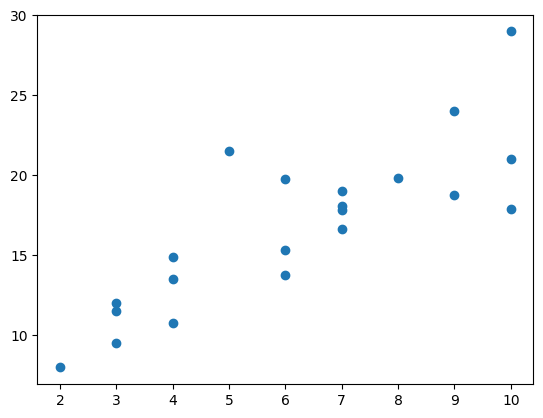

In [81]:
plt.scatter( df['Sorting Time'], df['Delivery Time'])
# sorting is indpendent variable(x axis) and delivery time is dependent variable(y axis)

# Draw the Box plot for "Delivery Time" and identify any outliers are there

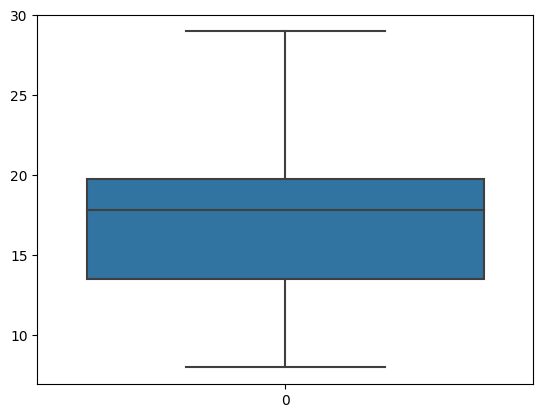

In [82]:
import seaborn as sns
sns.boxplot(df['Delivery Time'])


plt.show()
## we can observe that there are no outliers at all

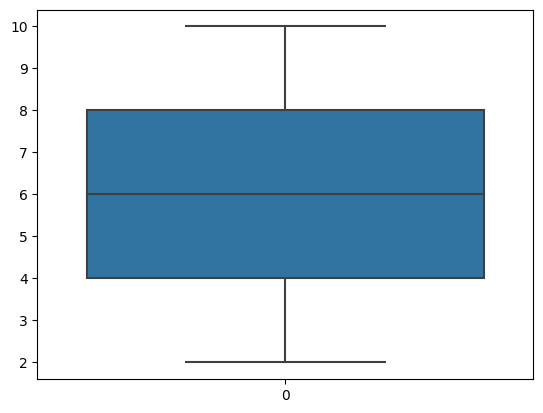

In [83]:
sns.boxplot(df['Sorting Time'])


plt.show()

# Draw the Box plot for "Delivery Time"  and " Sorting Time" in the same image/plot and identify any outliers are there

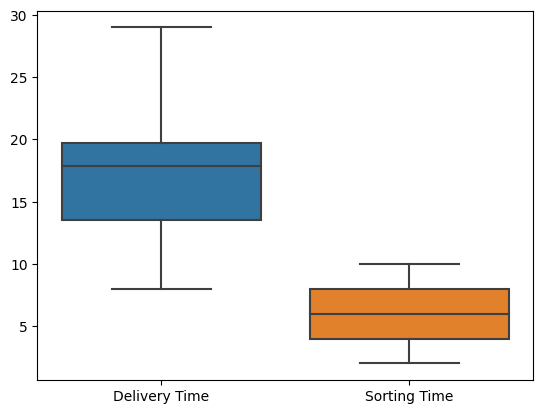

In [84]:
sns.boxplot(df)

plt.show()

# Draw the historam for "Delivery Time"

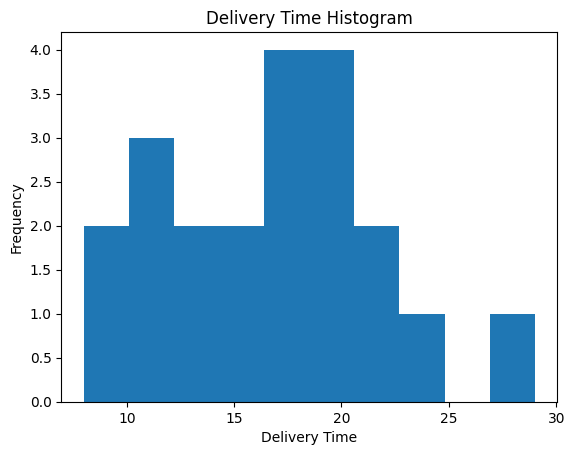

In [85]:
plt.hist(df['Delivery Time'])
plt.title('Delivery Time Histogram')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()


# Display the correlation between Deliver Time and Sorting Time 

In [86]:
print(df.corr())

               Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


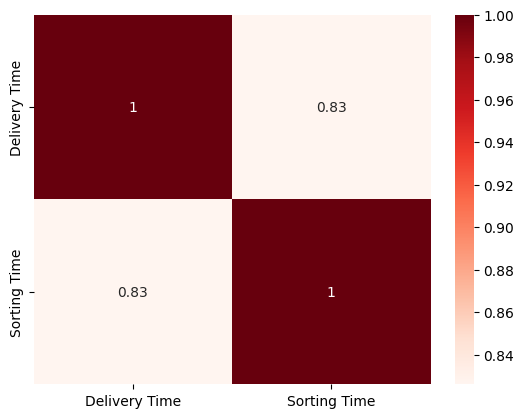

In [87]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
plt.show()

# Split the data into Train and test with 70/30

In [88]:
from sklearn.model_selection import train_test_split #cyclic learn
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state=42) #returns 4 parameters
print(x_train)

    Delivery Time
3           24.00
18           8.00
16          13.75
13          11.50
2           19.75
9           18.75
20          21.50
4           29.00
12          16.68
7            9.50
10          19.83
14          12.03
19          17.83
6           19.00


In [89]:
print(x_test)

    Delivery Time
0           21.00
17          18.11
15          14.88
1           13.50
8           17.90
5           15.35
11          10.75


In [90]:
print('x_train shape type: ', type(x_train))
print('y_train shape type: ', type(y_train))
print('x_test shape type: ', type(x_test))
print('y_test shape type: ', type(y_test))

x_train shape type:  <class 'pandas.core.frame.DataFrame'>
y_train shape type:  <class 'pandas.core.series.Series'>
x_test shape type:  <class 'pandas.core.frame.DataFrame'>
y_test shape type:  <class 'pandas.core.series.Series'>


# Build the model

In [91]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

# Display the regression coefficient values 

In [92]:
reg.intercept_


-0.507985795794025

In [93]:
reg.coef_


array([0.38201643])

In [94]:
print(reg.coef_[0])

0.38201642809023034


#Predict the values 

In [95]:
y_pred = reg.predict(x_test)
y_pred

array([7.51435919, 6.41033172, 5.17641865, 4.64923598, 6.33010827,
       5.35596638, 3.59869081])

# Display the metrics

In [96]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_preds)

    Actual  Predicted
0       10   7.514359
17       7   6.410332
15       4   5.176419
1        4   4.649236
8       10   6.330108
5        6   5.355966
11       4   3.598691


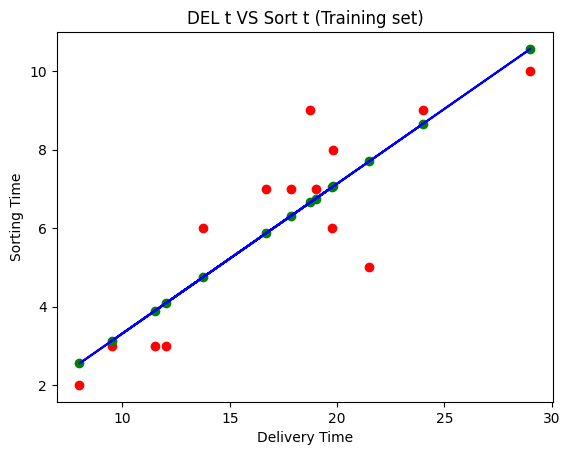

In [97]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.scatter(x_train, reg.predict(x_train), color = 'green')
plt.title('DEL t VS Sort t (Training set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

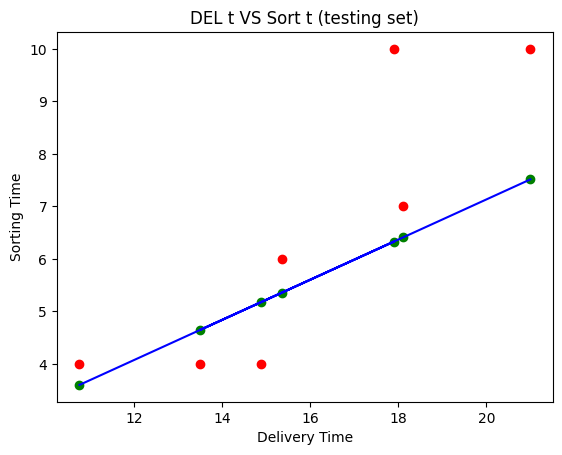

In [98]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, reg.predict(x_test), color = 'blue')
plt.scatter(x_test, reg.predict(x_test), color = 'green')
plt.title('DEL t VS Sort t (testing set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.7878766665108954

MODEL 2

In [100]:
df2 = pd.read_csv('delivery_time.csv')
df2

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [60]:
df2['Sorting Time'] = df2['Sorting Time']*df2['Sorting Time']
df2


,Delivery Time,Sorting Time
0,21.00,1000000
1,13.50,4096
2,19.75,46656
3,24.00,531441
4,29.00,1000000
5,15.35,46656
6,19.00,117649
7,9.50,729
8,17.90,1000000
9,18.75,531441


In [61]:
x2 = df2.iloc[:,:-1]
y2 = df2.iloc[:,-1]
x2
y2



0     1000000
1        4096
2       46656
3      531441
4     1000000
5       46656
6      117649
7         729
8     1000000
9      531441
10     262144
11       4096
12     117649
13        729
14        729
15       4096
16      46656
17     117649
18         64
19     117649
20      15625
Name: Sorting Time, dtype: int64

In [62]:
print('x shape:', x2.shape)
print('y shape:', y2.shape)
print('x shape:', x2.shape)
print('y shape:', y2.shape)
print('x shape type: ', type(x2))
print('y shape type: ', type(y2))


x shape: (21, 1)
y shape: (21,)
x shape: (21, 1)
y shape: (21,)
x shape type:  <class 'pandas.core.frame.DataFrame'>
y shape type:  <class 'pandas.core.series.Series'>


In [106]:
print(df2.corr())


               Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


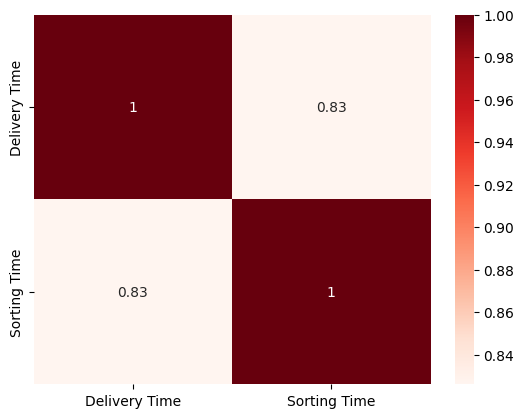

In [107]:
import seaborn as sns
sns.heatmap(df2.corr(), annot=True, cmap = 'Reds')
plt.show()

In [64]:
from sklearn.model_selection import train_test_split #cyclic learn
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.7, random_state=42) #returns 4 parameters


In [65]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(x2_train, y2_train)


LinearRegression()

In [66]:
reg2.intercept_



-471995.01635206153

In [67]:
reg2.coef_

array([38972.6743071])

In [68]:
y2_pred = reg2.predict(x2_test)
y2_pred
df2_preds = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
print(df2_preds)


     Actual      Predicted
0   1000000  346431.144097
17   117649  233800.115350
15     4096  107918.377338
1      4096   54136.086794
8   1000000  225615.853745
5     46656  126235.534262
11     4096  -53038.767551


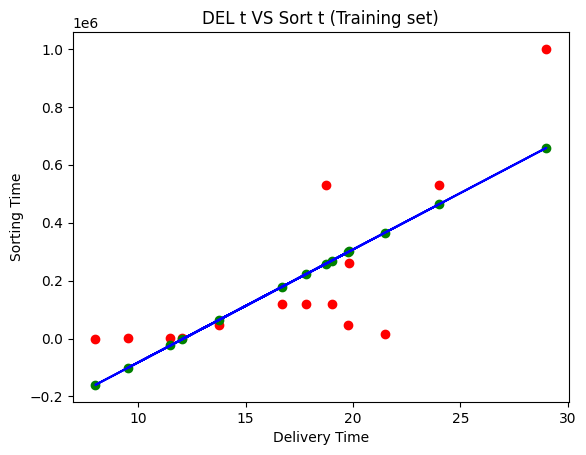

In [69]:
plt.scatter(x2_train, y2_train, color = 'red')
plt.plot(x2_train, reg2.predict(x2_train), color = 'blue')
plt.scatter(x2_train, reg2.predict(x2_train), color = 'green')
plt.title('DEL t VS Sort t (Training set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()


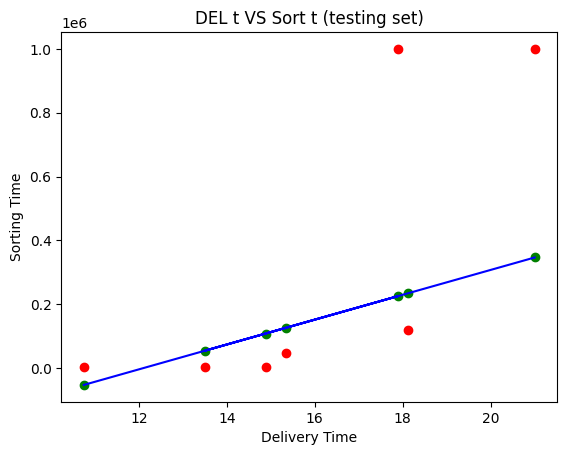

In [70]:
plt.scatter(x2_test, y2_test, color = 'red')
plt.plot(x2_test, reg2.predict(x2_test), color = 'blue')
plt.scatter(x2_test, reg2.predict(x2_test), color = 'green')
plt.title('DEL t VS Sort t (testing set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae2 = mean_absolute_error(y2_test, y2_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
rmse2

389724.17301634053

MODEL 3

dependent variables are log values

In [46]:
df3 = pd.read_csv('delivery_time.csv')
df3

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [47]:
df3['Sorting Time'] = np.log(df3['Sorting Time'])
df3


,Delivery Time,Sorting Time
0,21.00,2.302585
1,13.50,1.386294
2,19.75,1.791759
3,24.00,2.197225
4,29.00,2.302585
5,15.35,1.791759
6,19.00,1.945910
7,9.50,1.098612
8,17.90,2.302585
9,18.75,2.197225


In [48]:
x3 = df3.iloc[:,:-1]
y3 = df3.iloc[:,-1]
x3
y3
print('x shape:', x3.shape)
print('y shape:', y3.shape)
print('x shape:', x3.shape)
print('y shape:', y3.shape)
print('x shape type: ', type(x3))
print('y shape type: ', type(y3))

x shape: (21, 1)
y shape: (21,)
x shape: (21, 1)
y shape: (21,)
x shape type:  <class 'pandas.core.frame.DataFrame'>
y shape type:  <class 'pandas.core.series.Series'>


In [49]:
print(df3.corr())

               Delivery Time  Sorting Time
Delivery Time       1.000000      0.833933
Sorting Time        0.833933      1.000000


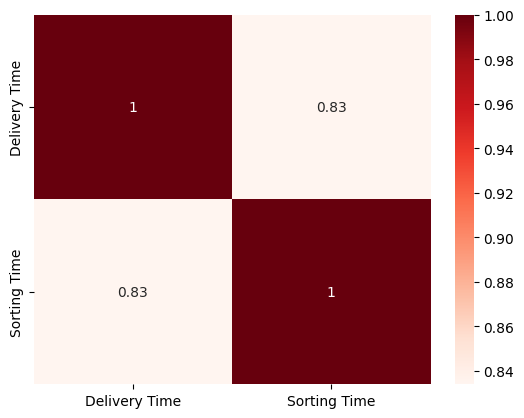

In [105]:
import seaborn as sns
sns.heatmap(df3.corr(), annot=True, cmap = 'Reds')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split #cyclic learn
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.7, random_state=42) #returns 4 parameters

In [51]:
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()
reg3.fit(x3_train, y3_train)

LinearRegression()

In [52]:
reg3.intercept_

0.41652468485452543

In [53]:
reg3.coef_

array([0.07450565])

In [54]:
y3_pred = reg3.predict(x3_test)
y3_pred
df3_preds = pd.DataFrame({'Actual': y3_test, 'Predicted': y3_pred})
print(df3_preds)



      Actual  Predicted
0   2.302585   1.981143
17  1.945910   1.765822
15  1.386294   1.525169
1   1.386294   1.422351
8   2.302585   1.750176
5   1.791759   1.560186
11  1.386294   1.217460


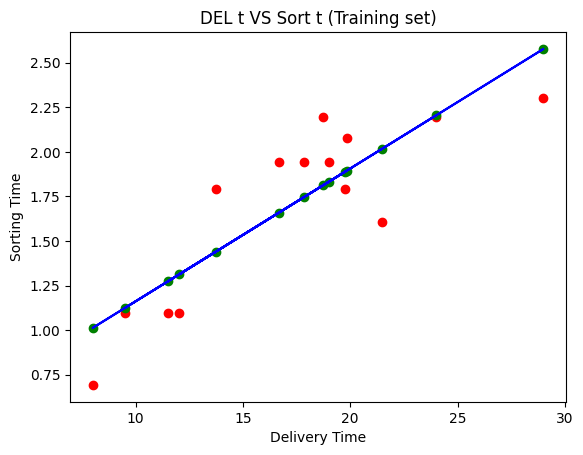

In [55]:
plt.scatter(x3_train, y3_train, color = 'red')
plt.plot(x3_train, reg3.predict(x3_train), color = 'blue')
plt.scatter(x3_train, reg3.predict(x3_train), color = 'green')
plt.title('DEL t VS Sort t (Training set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()


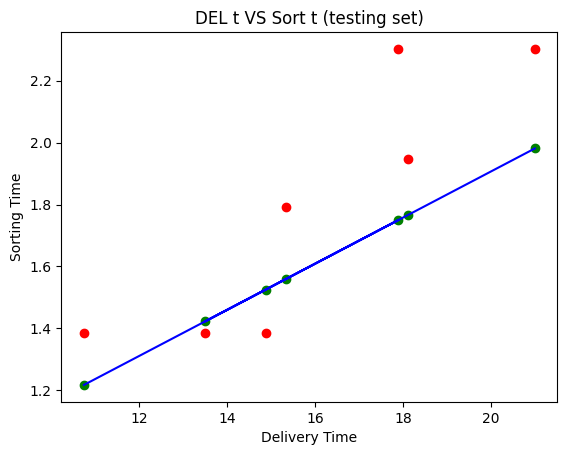

In [56]:
plt.scatter(x3_test, y3_test, color = 'red')
plt.plot(x3_test, reg3.predict(x3_test), color = 'blue')
plt.scatter(x3_test, reg3.predict(x3_test), color = 'green')
plt.title('DEL t VS Sort t (testing set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae3 = mean_absolute_error(y3_test, y3_pred)
mse3 = mean_squared_error(y3_test, y3_pred)
rmse3 = np.sqrt(mse3)
rmse3

0.2786779634183939

# Display the Root Mean Square Error of all three model and visualize the same 

By above codes we can observe that they are as follows

Model 1 RMSE value **1.7878766665108954**

Model 2 RMSE value **389724.17301634053**

Model 3 RMSE value **0.2786779634183939**

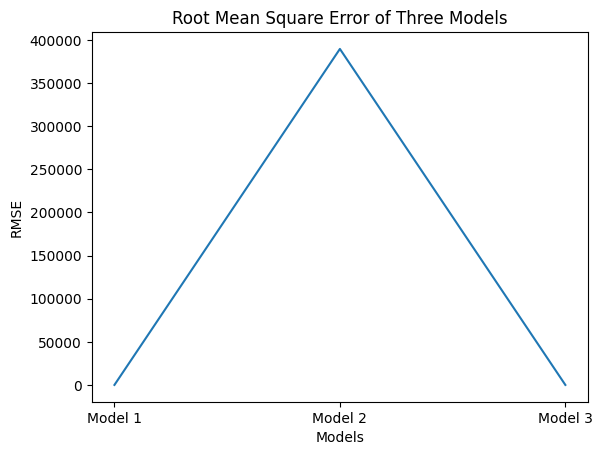

In [72]:
# create a list of RMSE values
rmse_values = [1.7878766665108954, 389724.17301634053, 0.2786779634183939]

# plot a bar chart
plt.plot(['Model 1', 'Model 2', 'Model 3'], rmse_values)
plt.title('Root Mean Square Error of Three Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

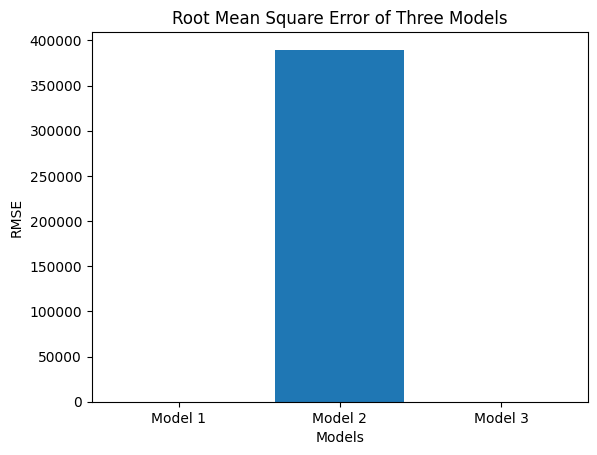

In [73]:
plt.bar(['Model 1', 'Model 2', 'Model 3'], rmse_values)
plt.title('Root Mean Square Error of Three Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()